In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
#read in csv file
df = pd.read_csv('Mercedes Price Data.csv',delimiter=';')

#### Data pre-processing and feature engineering ####

In [52]:
#strip leading and trailing whitespace from columns
col_name=[]
for col in df.columns:
    name = col.lstrip()
    name = name.rstrip()
    name = name.lower()
    col_name.append(name)
    
df.columns=col_name

In [53]:
#create function to extract month value only
def extract_month(row):
    month_name = row['date'][:3]
    return month_name

In [54]:
#create function to extract month value only
def extract_year(row):
    year = '20'+row['date'][4:]
    return year

In [55]:
#create function to convert text date to datetime
def conv_date(row):
    months={'gen':'01','feb':'02','mar':'03','apr':'04','mag':'05','giu':'06','lug':'07','ago':'08','set':'09','ott':'10','nov':'11','dic':'12'}
    day = '01'
    month_name = row['date'][:3]
    month_val = months[month_name]
    year = '20'+row['date'][4:]
    date_time_str = year+'-'+month_val+'-'+day+' 00:00:00'
    date = datetime.strptime(date_time_str,'%Y-%m-%d %H:%M:%S')
    return date

In [56]:
#extract month
df['month'] = df.apply(extract_month, axis = 1)
#extract month
df['year'] = df.apply(extract_year, axis = 1)
#convert text date to datetime
df['date'] = df.apply(conv_date, axis = 1)

In [57]:
df.describe()

,c.class.average.price,unit.c,e.class.average.price,unit.e,s.class.average.price,unit.s,cl.class.average.price,unit.cl,sl.class.average.price,unit.sl,m.class.average.price,unit.m
count,35.000000,30.000000,35.000000,30.000000,35.000000,30.000000,35.000000,30.000000,35.000000,30.000000,35.000000,30.000000
mean,37427.885714,5136.033333,62888.457143,3618.633333,121180.285714,1873.366667,145627.142857,215.633333,135969.285714,523.000000,53664.628571,2658.133333
std,865.076255,1153.987614,981.542674,1139.601488,11290.883226,631.096390,23570.500765,107.440596,1185.157685,225.753909,4860.404432,534.016836
min,36650.000000,3032.000000,61420.000000,1768.000000,101100.000000,516.000000,122825.000000,41.000000,134225.000000,133.000000,44900.000000,1353.000000
25%,36650.000000,4352.250000,62818.000000,2971.000000,124750.000000,1580.500000,122825.000000,111.750000,136175.000000,371.500000,56040.000000,2434.000000
50%,37256.000000,4714.000000,62818.000000,3702.000000,124750.000000,1921.000000,132050.000000,232.000000,136175.000000,494.500000,56040.000000,2698.500000
75%,37256.000000,6061.750000,63443.000000,4203.750000,128320.000000,2422.000000,176000.000000,296.500000,136250.000000,648.750000,56136.000000,3006.500000
max,38917.000000,7646.000000,64868.000000,7116.000000,131890.000000,2987.000000,176000.000000,391.000000,138675.000000,1083.000000,57650.000000,3889.000000


In [58]:
#calculate % of nan in each column
for col in df.columns:
    perc_nan = (df[col].isnull().sum()/df[col].count())*100
    print(col+': '+str(perc_nan)+'%')

date: 0.0%
c.class.average.price: 0.0%
unit.c: 16.666666666666664%
e.class.average.price: 0.0%
unit.e: 16.666666666666664%
s.class.average.price: 0.0%
unit.s: 16.666666666666664%
cl.class.average.price: 0.0%
unit.cl: 16.666666666666664%
sl.class.average.price: 0.0%
unit.sl: 16.666666666666664%
m.class.average.price: 0.0%
unit.m: 16.666666666666664%
month: 0.0%
year: 0.0%


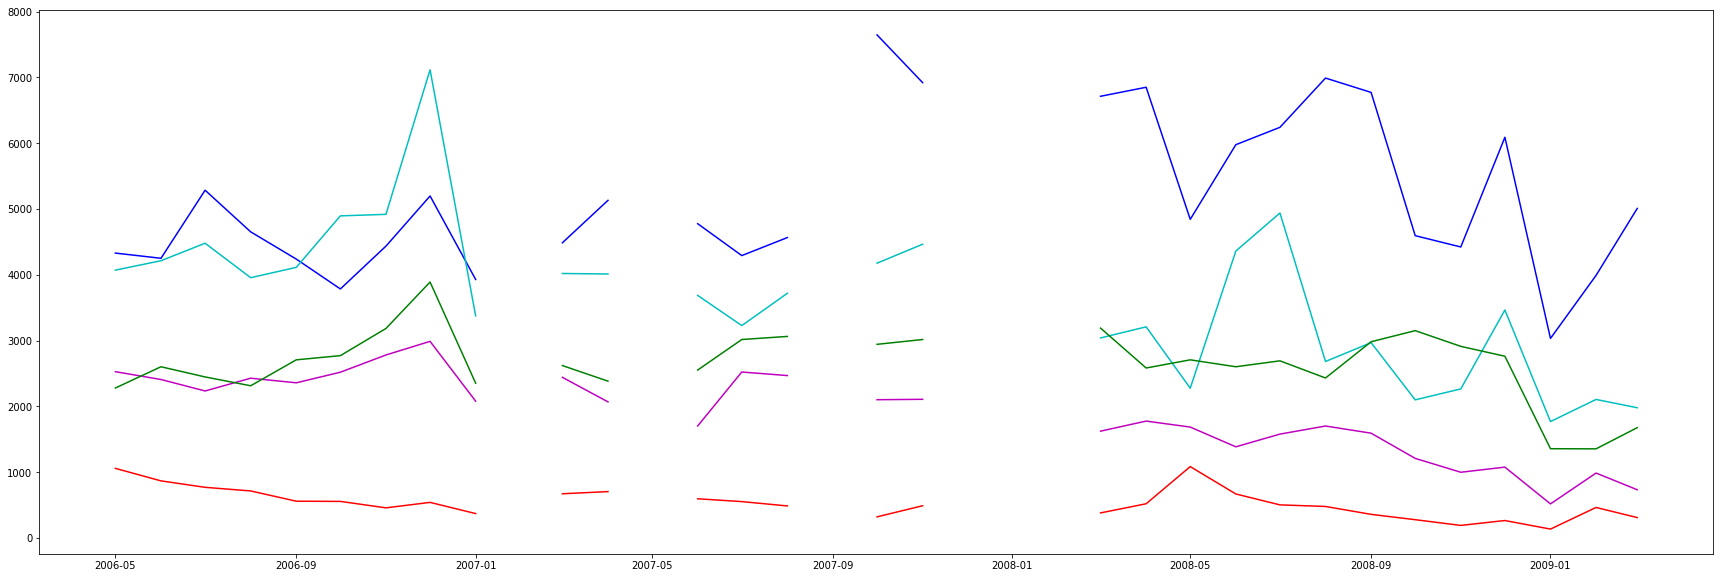

In [59]:
#plot untis to visualize missing data points
f1, ax = plt.subplots(figsize = (30,10))
plt.plot(df['date'],df['unit.c'],'b')
plt.plot(df['date'],df['unit.e'],'c')
plt.plot(df['date'],df['unit.s'],'m')
plt.plot(df['date'],df['unit.sl'],'r')
plt.plot(df['date'],df['unit.m'],'g')

In [60]:
#to facilitate time interpolation index must be datetime
df.set_index('date', drop=True, inplace=True)

In [61]:
#use time series interpolation to impute missing data points
for col in ['unit.c','unit.e','unit.s','unit.cl','unit.sl','unit.m']:
    df[col].interpolate(method='time',inplace=True)

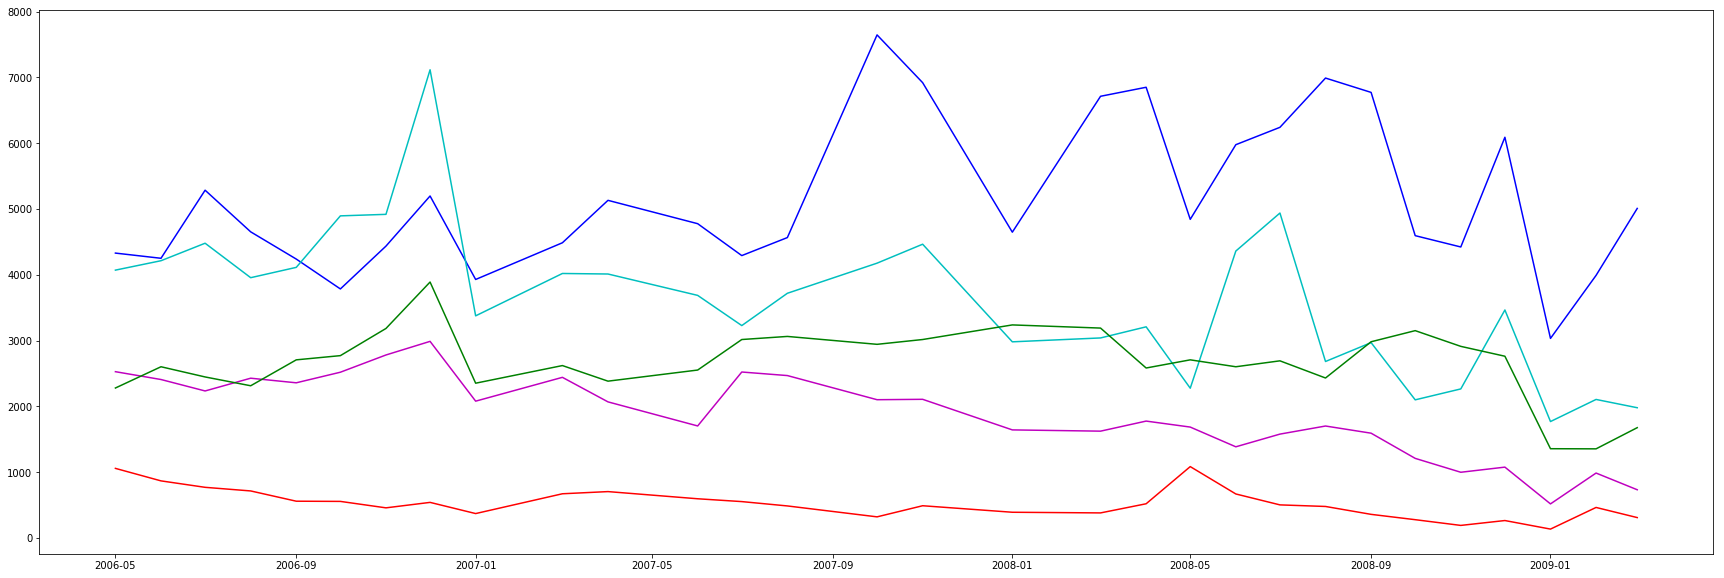

In [62]:
#plot untis to visualize missing data points
f1, ax = plt.subplots(figsize = (30,10))
plt.plot(df['unit.c'],'b')
plt.plot(df['unit.e'],'c')
plt.plot(df['unit.s'],'m')
plt.plot(df['unit.sl'],'r')
plt.plot(df['unit.m'],'g')

In [63]:
df.to_csv('Mercedes Price Data v2.csv')

### Linear Regression Model ###

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [65]:
#normalize units to range 0 to 1
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
#split units and prices to seperate arrays
normalized_unit_df = df[['unit.c','unit.e', 'unit.s', 'unit.cl', 'unit.sl', 'unit.m']].values
normalized_price_df = df[['c.class.average.price', 'e.class.average.price', 's.class.average.price', 'cl.class.average.price', 'sl.class.average.price', 'm.class.average.price']].values
#apply normalization to arrays
normalized_unit_df = min_max_scaler.fit_transform(normalized_unit_df )
normalized_price_df = min_max_scaler.fit_transform(normalized_price_df )
#create df's from arrays
normalized_unit_df = pd.DataFrame(normalized_unit_df, index=df.index, columns=['unit.c','unit.e', 'unit.s', 'unit.cl', 'unit.sl', 'unit.m'])
normalized_price_df = pd.DataFrame(normalized_price_df, index=df.index, columns=['c.class.average.price', 'e.class.average.price', 's.class.average.price', 'cl.class.average.price', 'sl.class.average.price', 'm.class.average.price'])
#merge df's
normalized_df = pd.merge(normalized_unit_df, normalized_price_df, left_index=True, right_index=True)
normalized_df.head()

C:\Users\CiaranCarroll\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


,unit.c,unit.e,unit.s,unit.cl,unit.sl,unit.m,c.class.average.price,e.class.average.price,s.class.average.price,cl.class.average.price,sl.class.average.price,m.class.average.price
date,,,,,,,,,,,,
2006-05-01,0.281101,0.430441,0.813436,0.014286,0.971579,0.364748,1.0,0.0,0.0,0.173484,0.0,0.0
2006-06-01,0.263979,0.457180,0.765277,0.062857,0.771579,0.492114,1.0,0.0,0.0,0.173484,0.0,0.0
2006-07-01,0.488296,0.506918,0.694860,0.031429,0.668421,0.430994,1.0,0.0,0.0,0.173484,0.0,0.0
2006-08-01,0.351105,0.408938,0.773371,0.037143,0.610526,0.378155,1.0,0.0,0.0,0.173484,0.0,0.0
2006-09-01,0.261378,0.438295,0.745042,0.000000,0.446316,0.533517,1.0,0.0,0.0,0.173484,0.0,0.0


Text(0.5,1,'M Class Price vs Units')

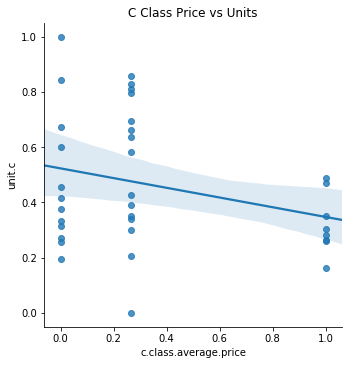

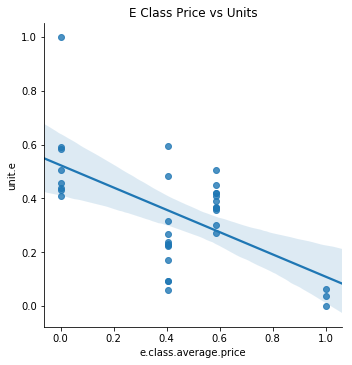

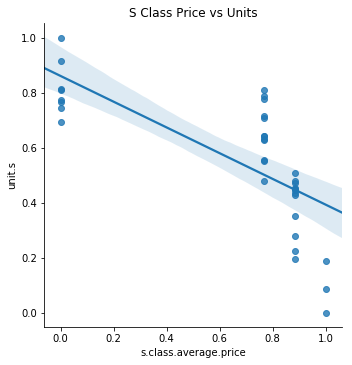

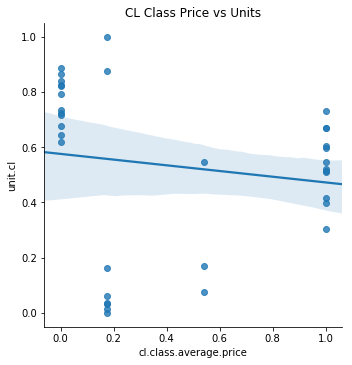

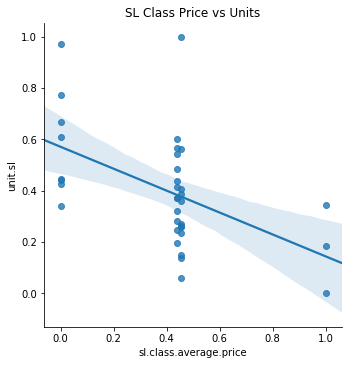

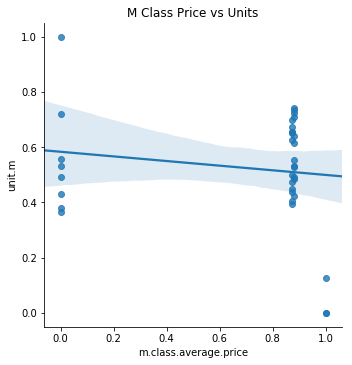

In [66]:
#plot price vs units
sns.lmplot(x='c.class.average.price',y='unit.c',data=normalized_df)
plt.title("C Class Price vs Units")
sns.lmplot(x='e.class.average.price',y='unit.e',data=normalized_df)
plt.title("E Class Price vs Units")
sns.lmplot(x='s.class.average.price',y='unit.s',data=normalized_df)
plt.title("S Class Price vs Units")
sns.lmplot(x='cl.class.average.price',y='unit.cl',data=normalized_df)
plt.title("CL Class Price vs Units")
sns.lmplot(x='sl.class.average.price',y='unit.sl',data=normalized_df)
plt.title("SL Class Price vs Units")
sns.lmplot(x='m.class.average.price',y='unit.m',data=normalized_df)
plt.title("M Class Price vs Units")

In [67]:
#declare x and y variables
y = df[['unit.c']]
X = df[['c.class.average.price']]

In [68]:
#fit linear model
lm = LinearRegression()
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [69]:
# print the intercept
lm.intercept_[0]

18563.483601470125

In [70]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
c.class.average.price,-0.357881


In [71]:
print(lm.score(X,y))

0.07906325828839234


#### Include month variable dummies to account for seasonality

In [72]:
# create dummy variables for months
months = df[['month']]
months = pd.get_dummies(months,prefix=['month_'], drop_first=True)

In [73]:
df = pd.merge(left = df, right = months, left_index=True, right_index=True)

In [74]:
#declare x and y variables
y = df['unit.c']
X = df[['c.class.average.price','month__apr','month__dic', 'month__feb', 'month__gen', 'month__giu', 'month__lug','month__mag', 'month__mar', 'month__nov', 'month__ott', 'month__set']]

In [75]:
#fit linear model
lm = LinearRegression()
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [76]:
print(lm.score(X,y))

0.36714009105444356


In [77]:
# print the intercept
lm.intercept_

22889.828699413592

In [78]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
c.class.average.price,-0.464998
month__apr,283.747879
month__dic,294.043716
month__feb,-1017.914050
month__gen,-1790.787308
month__giu,-401.333333
month__lug,-130.000000
month__mag,-693.196721
month__mar,-257.453975
month__nov,-143.333333


In [79]:
y_hat = lm.predict(X)

In [80]:
df['y_hat']=lm.predict(X)

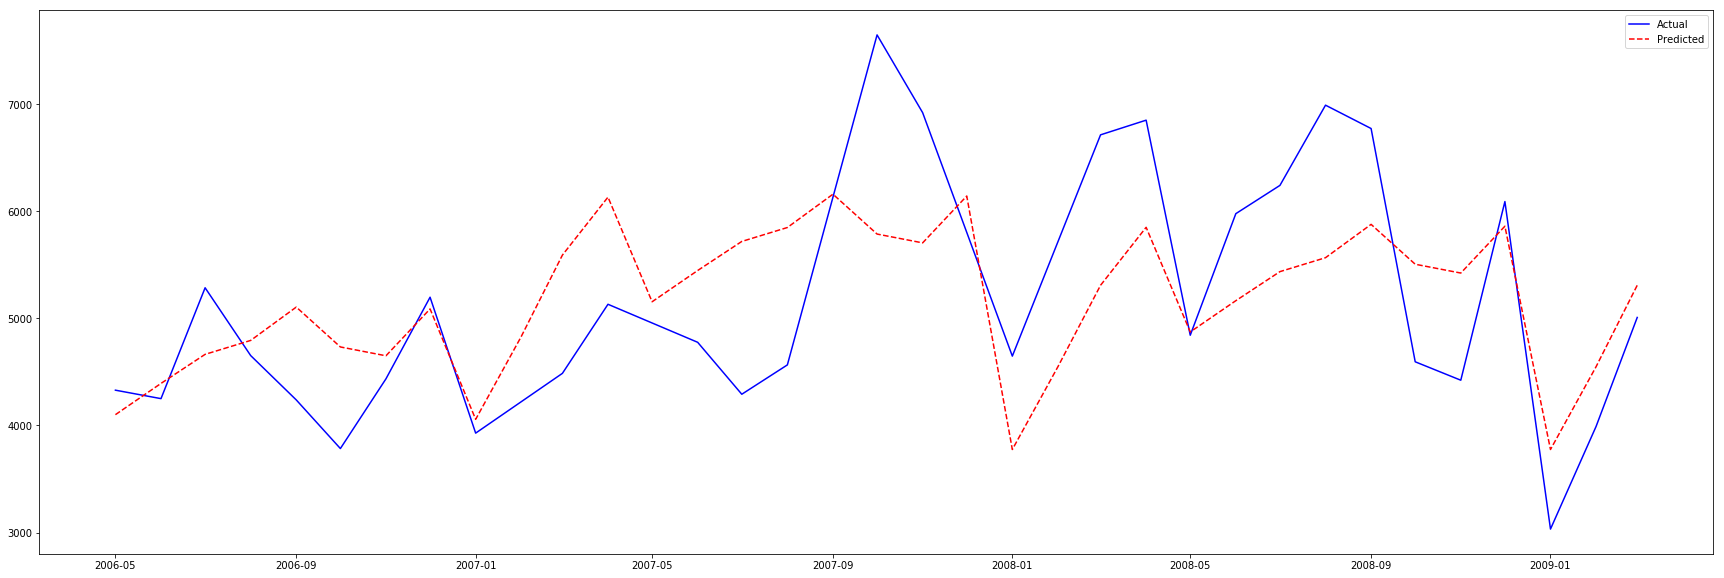

In [81]:
#plot untis to visualize missing data points
f1, ax = plt.subplots(figsize = (30,10))
plt.plot(df['unit.c'],'b',label='Actual')
plt.plot(df['y_hat'],'r',linestyle='--',label='Predicted')
plt.legend()

Text(0,0.5,'Residuals')

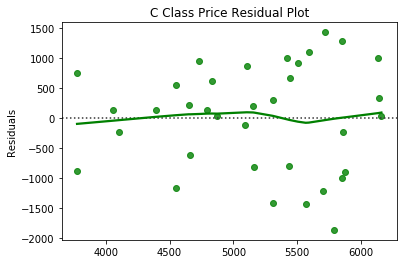

In [82]:
# Plot the residuals of linear model
sns.residplot(y_hat, y_hat-y, lowess=True, color="g")
plt.title("C Class Price Residual Plot")
plt.ylabel('Residuals')

Residual plot does not show any specific trend to indicate issues with the model, possibly increased variance, will try applying transformation to variables

#### Log Transformation of Variables - Log : Log model ####

In [83]:
#apply log transformation to price and dependent variables
log_df = df[['c.class.average.price','unit.c']]
log_df['c.class.average.price(log)'] = log_df['c.class.average.price'].apply(np.log)

C:\Users\CiaranCarroll\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [84]:
#merge transformed data with monthly dummy variables
log_df = pd.merge(left = log_df, right = months, left_index=True, right_index=True)

In [85]:
#declare x and y variables
y = log_df['unit.c'].apply(np.log)
X = log_df[['c.class.average.price(log)','month__apr','month__dic', 'month__feb', 
        'month__gen', 'month__giu', 'month__lug','month__mag', 
        'month__mar', 'month__nov', 'month__ott', 'month__set']]

In [86]:
#fit linear model
lm = LinearRegression()
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [87]:
#print score
print(lm.score(X,y))

0.39752609905310327


In [88]:
# print the intercept
lm.intercept_

43.19243284850353

In [89]:
#create df of model coefficients and intercept
coeff_labels = X.columns[1:]
coeff_labels = coeff_labels.insert(0,'Log Avg Price')
coeff_labels = coeff_labels.insert(0,'Intercept')
coeff_vals = lm.coef_.tolist()
coeff_vals.insert(0, lm.intercept_)
coeff_vals
coeffs = pd.DataFrame(dict(zip(coeff_labels, coeff_vals)),index=['C Class Coeffs'])
coeffs

,Intercept,Log Avg Price,month__apr,month__dic,month__feb,month__gen,month__giu,month__lug,month__mag,month__mar,month__nov,month__ott,month__set
C Class Coeffs,43.192433,-3.286106,0.056283,0.07092,-0.192209,-0.376652,-0.067252,-0.015888,-0.11895,-0.042495,-0.029887,-0.036827,0.05667


In [90]:
y_hat = lm.predict(X)
log_df['y_hat']=lm.predict(X)

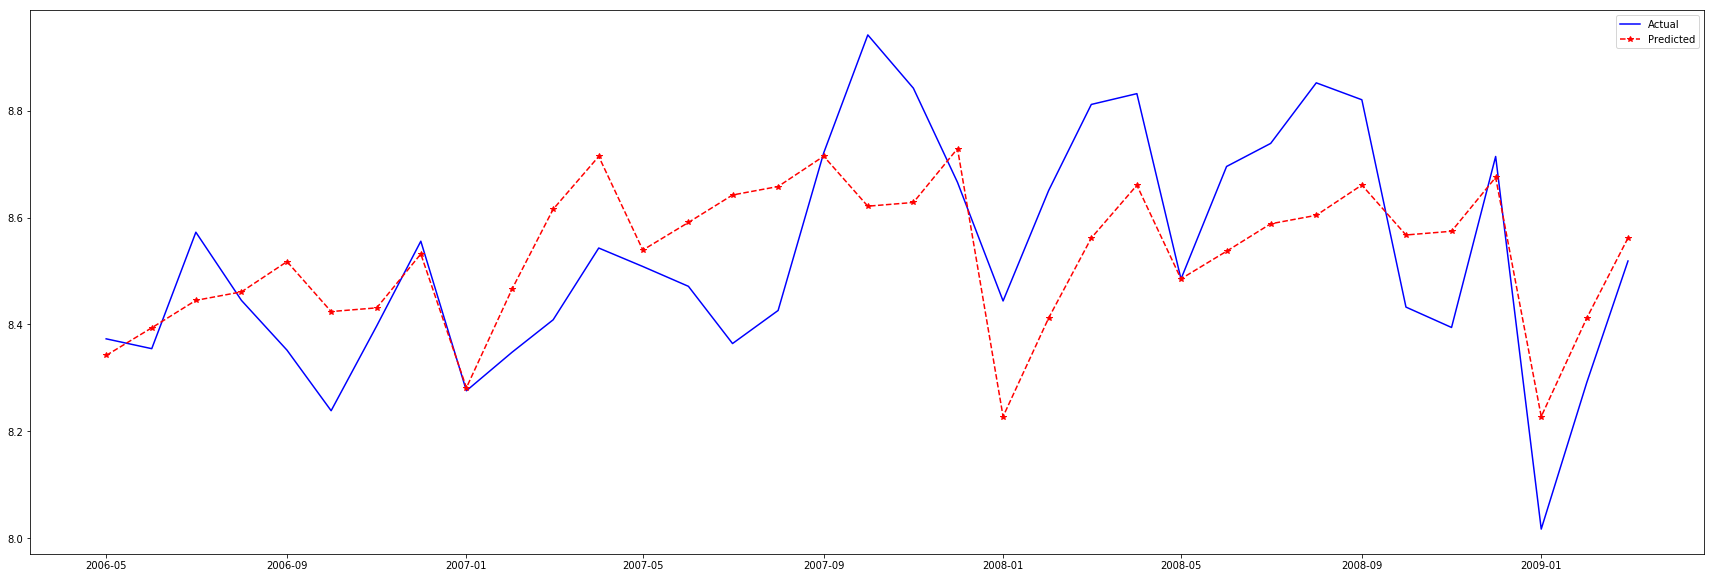

In [91]:
#plot predictions vs actual
f1, ax = plt.subplots(figsize = (30,10))
plt.plot(log_df['unit.c'].apply(np.log),'b',label='Actual')
plt.plot(log_df['y_hat'],'r',marker='*',linestyle='--',label='Predicted')
plt.legend()

Text(0,0.5,'Residuals')

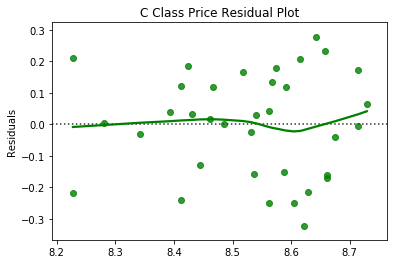

In [92]:
# Plot the residuals of linear model
sns.residplot(y_hat, y_hat-y, lowess=True, color="g")
plt.title("C Class Price Residual Plot")
plt.ylabel('Residuals')

slight positive trend in residual variance towards right, but mostly centred around 0

#### log lin model ####

In [93]:
#create data set
log_df = df[['c.class.average.price','unit.c']]

In [94]:
#merge with monthly dummy variables
log_df = pd.merge(left = log_df, right = months, left_index=True, right_index=True)

In [95]:
#declare x and y variables
y = log_df['unit.c'].apply(np.log)
X = log_df[['c.class.average.price','month__apr','month__dic', 'month__feb', 
        'month__gen', 'month__giu', 'month__lug','month__mag', 
        'month__mar', 'month__nov', 'month__ott', 'month__set']]

In [96]:
#fit linear model
lm = LinearRegression()
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [97]:
#print score
print(lm.score(X,y))

0.39898110338434895


In [98]:
# print the intercept
lm.intercept_

11.864558621268907

In [99]:
#create df of coeffs and intercept
coeff_labels = X.columns[1:]
coeff_labels = coeff_labels.insert(0,'Avg Price')
coeff_labels = coeff_labels.insert(0,'Intercept')
coeff_vals = lm.coef_.tolist()
coeff_vals.insert(0, lm.intercept_)
coeff_vals
coeffs = pd.DataFrame(dict(zip(coeff_labels, coeff_vals)),index=['C Class Coeffs'])
coeffs

,Intercept,Avg Price,month__apr,month__dic,month__feb,month__gen,month__giu,month__lug,month__mag,month__mar,month__nov,month__ott,month__set
C Class Coeffs,11.864559,-0.000087,0.05577,0.07092,-0.192868,-0.377311,-0.067252,-0.015888,-0.11895,-0.043154,-0.029887,-0.036827,0.05667


In [100]:
#include predictions in df
log_df['y_hat']=lm.predict(X)

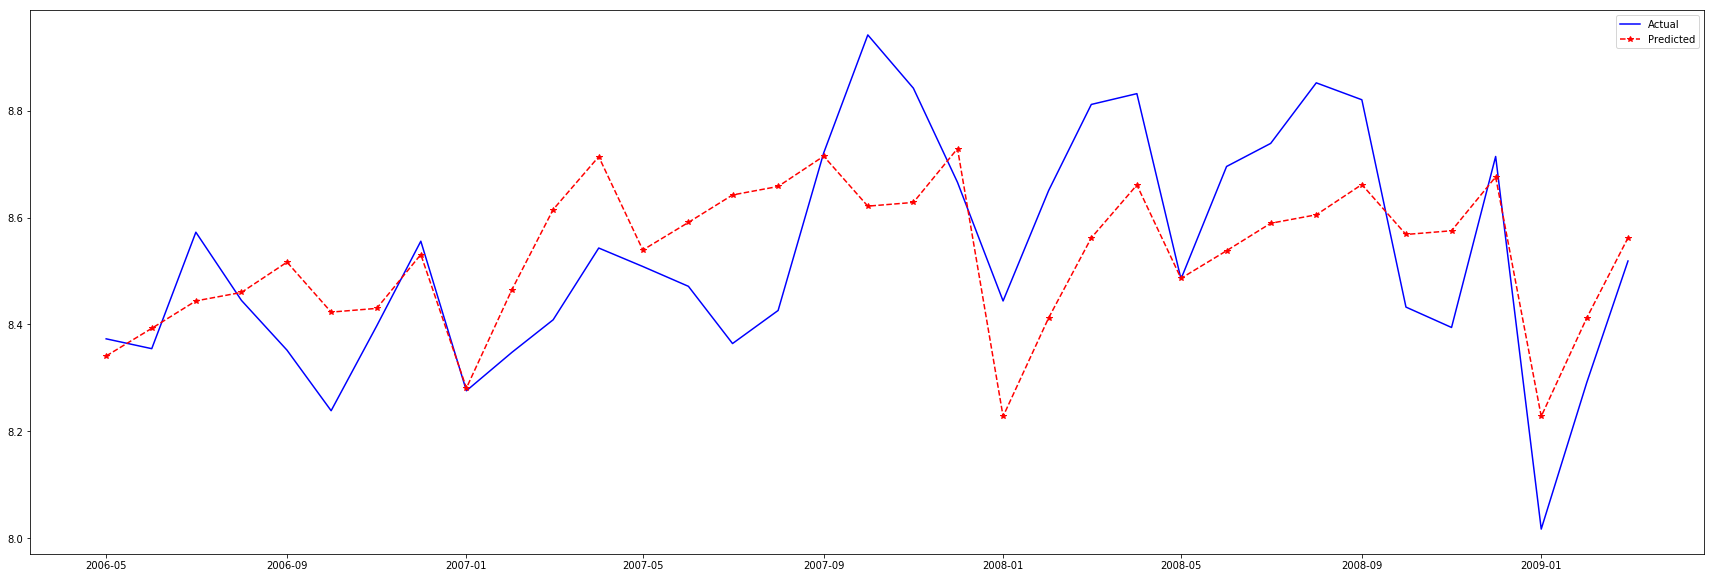

In [101]:
#plot predictions vs actual
f1, ax = plt.subplots(figsize = (30,10))
plt.plot(log_df['unit.c'].apply(np.log),'b',label='Actual')
plt.plot(log_df['y_hat'],'r',marker='*',linestyle='--',label='Predicted')
plt.legend()

#### lin log model ####

In [102]:
#create df and apply log transform to price only
log_df = df[['c.class.average.price','unit.c']]
log_df['c.class.average.price(log)'] = log_df['c.class.average.price'].apply(np.log)

C:\Users\CiaranCarroll\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [103]:
#merge df with monthly dummys
log_df = pd.merge(left = log_df, right = months, left_index=True, right_index=True)

In [104]:
#declare x and y variables
y = log_df['unit.c']
X = log_df[['c.class.average.price(log)','month__apr','month__dic', 'month__feb', 
        'month__gen', 'month__giu', 'month__lug','month__mag', 
        'month__mar', 'month__nov', 'month__ott', 'month__set']]

In [105]:
#fit linear model
lm = LinearRegression()
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [106]:
#print score
print(lm.score(X,y))

0.36559926303336254


In [107]:
# print the intercept
lm.intercept_

189379.50719137982

In [108]:
#create df of coeffs and intercept
coeff_labels = X.columns[1:]
coeff_labels = coeff_labels.insert(0,'Log Avg Price')
coeff_labels = coeff_labels.insert(0,'Intercept')
coeff_vals = lm.coef_.tolist()
coeff_vals.insert(0, lm.intercept_)
coeff_vals
coeffs = pd.DataFrame(dict(zip(coeff_labels, coeff_vals)),index=['C Class Coeffs'])
coeffs

,Intercept,Log Avg Price,month__apr,month__dic,month__feb,month__gen,month__giu,month__lug,month__mag,month__mar,month__nov,month__ott,month__set
C Class Coeffs,189379.507191,-17464.019066,286.516742,294.043716,-1014.376245,-1787.249503,-401.333333,-130.0,-693.196721,-253.916169,-143.333333,-61.0,311.251366


In [109]:
#include predcitions in df
log_df['y_hat']=lm.predict(X)

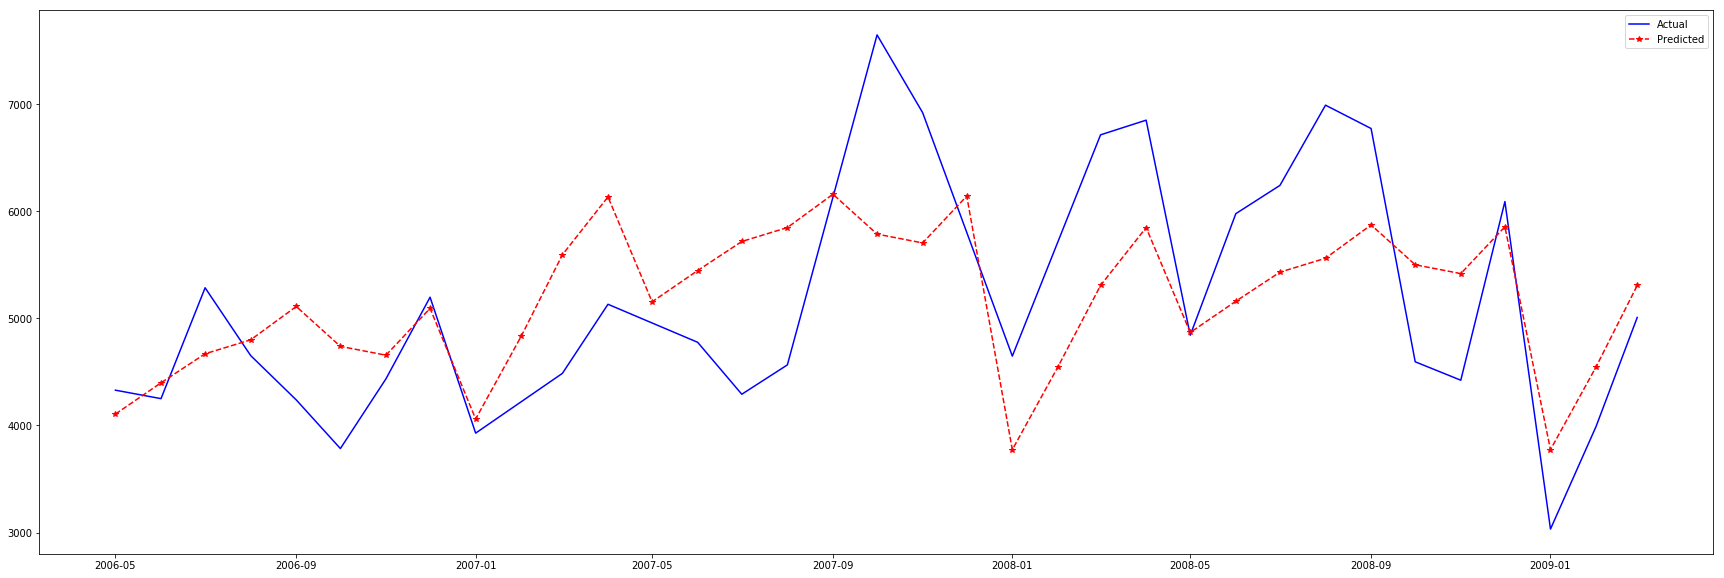

In [110]:
#plot predictions vs actual
f1, ax = plt.subplots(figsize = (30,10))
plt.plot(log_df['unit.c'],'b',label='Actual')
plt.plot(log_df['y_hat'],'r',marker='*',linestyle='--',label='Predicted')
plt.legend()

#### Exp transformation of price ###

In [111]:
exp_df = df[['c.class.average.price','unit.c']]

In [112]:
exp_df = pd.merge(left = exp_df, right = months, left_index=True, right_index=True)

In [113]:
exp_df['c.class.average.price'] = exp_df['c.class.average.price']**2

In [114]:
#declare x and y variables
y = exp_df['unit.c']
X = exp_df.drop(columns=['unit.c'])

In [115]:
#fit linear model
lm = LinearRegression()
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [116]:
#print score
print(lm.score(X,y))

0.36865918628683425


In [117]:
# print the intercept
lm.intercept_

14158.932163067642

In [118]:
coeff_labels = X.columns[1:]
coeff_labels = coeff_labels.insert(0,'Exp Avg Price')
coeff_labels = coeff_labels.insert(0,'Intercept')
coeff_vals = lm.coef_.tolist()
coeff_vals.insert(0, lm.intercept_)
coeff_vals
coeffs = pd.DataFrame(dict(zip(coeff_labels, coeff_vals)),index=['C Class Coeffs'])
coeffs

,Intercept,Exp Avg Price,month__apr,month__dic,month__feb,month__gen,month__giu,month__lug,month__mag,month__mar,month__nov,month__ott,month__set
C Class Coeffs,14158.932163,-0.000006,281.035838,294.043716,-1021.405809,-1794.279067,-401.333333,-130.0,-693.196721,-260.945734,-143.333333,-61.0,311.251366


In [119]:
y_hat = lm.predict(X)
exp_df['y_hat']=lm.predict(X)

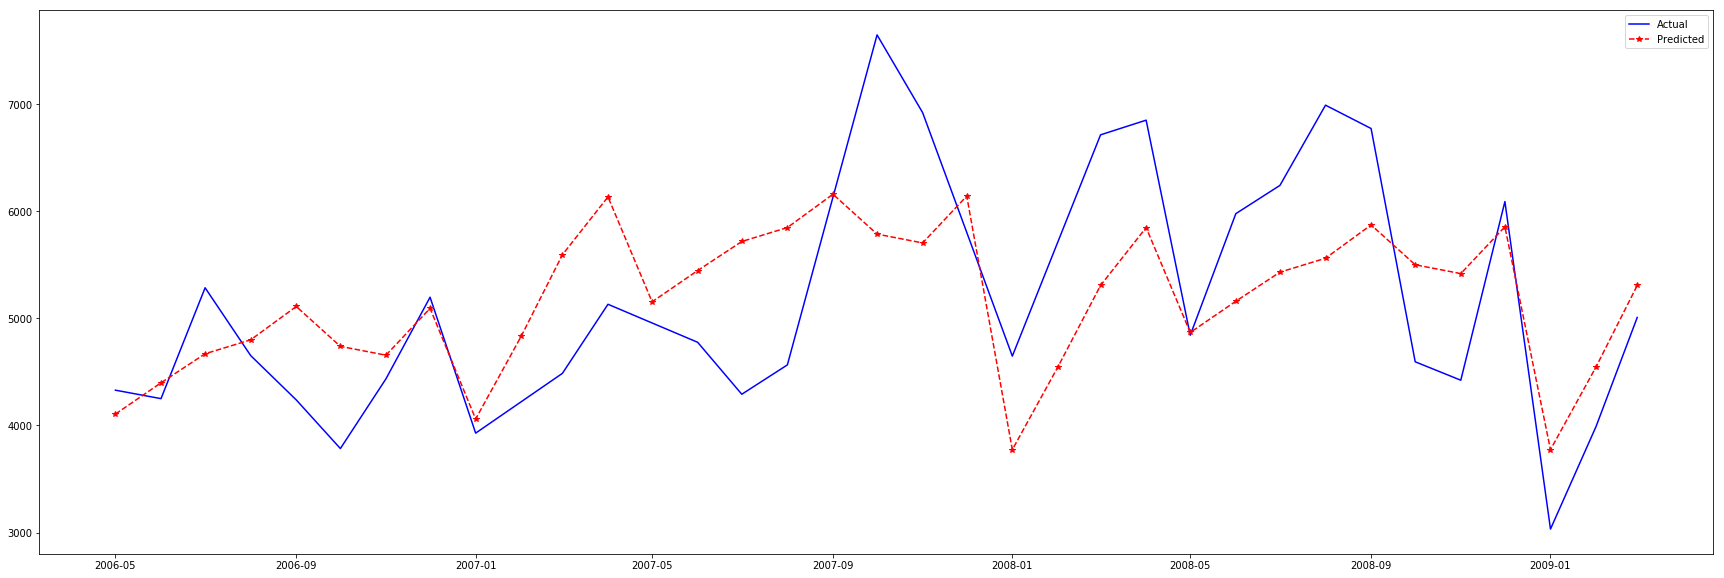

In [120]:
#plot predictions vs actual
f1, ax = plt.subplots(figsize = (30,10))
plt.plot(log_df['unit.c'],'b',label='Actual')
plt.plot(log_df['y_hat'],'r',marker='*',linestyle='--',label='Predicted')
plt.legend()

### Time Series Forecast ###

In [121]:
#import required libraries
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [122]:
#create df of units variable
forecast_df = df[['unit.c']]

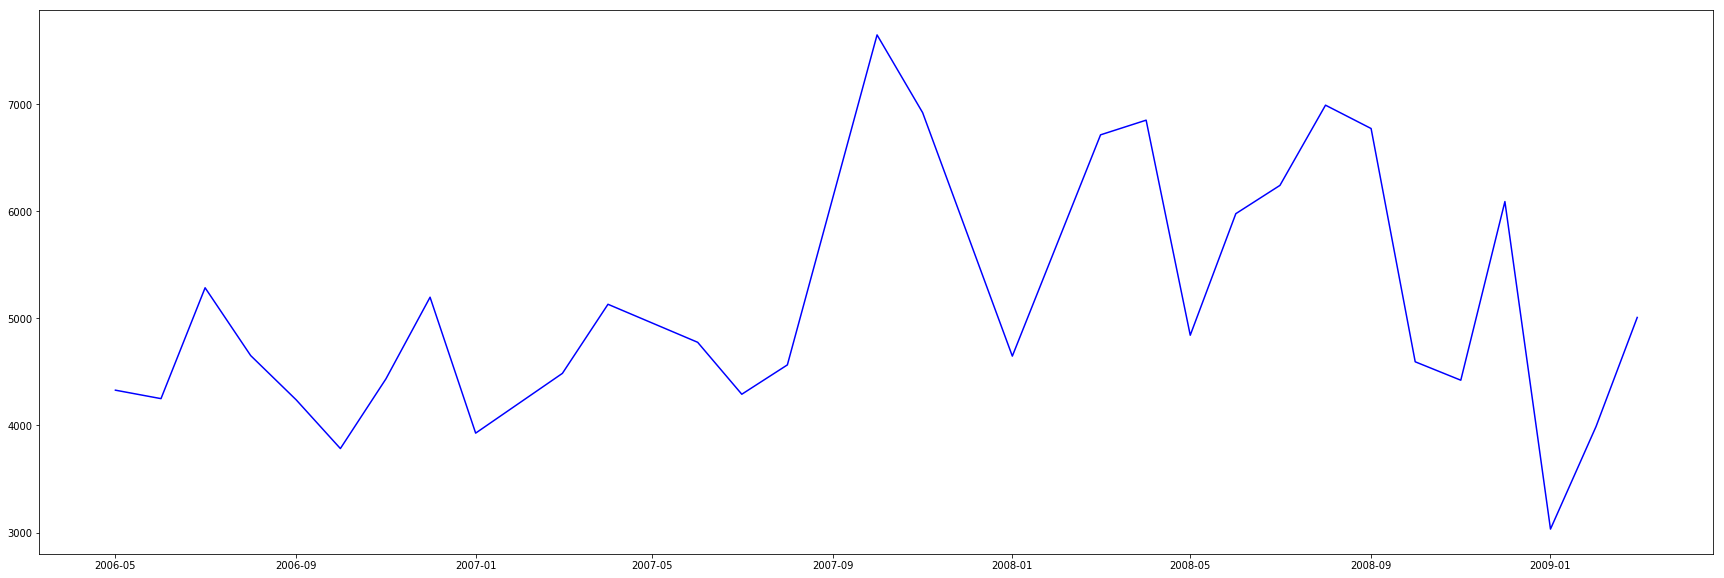

In [123]:
#plot untis over time
f1, ax = plt.subplots(figsize = (30,10))
plt.plot(forecast_df['unit.c'],'b')

In [124]:
#perform augmented dickey fuller test for differencing
result = adfuller(forecast_df['unit.c'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -3.292134
p-value: 0.015234


Dickey Fuller test indicates stationary variable, can be further illustrated with autocorrelation plot

C:\Users\CiaranCarroll\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\CiaranCarroll\Anaconda3\lib\site-packages\matplotlib\pyplot.py:984: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  return gcf().gca(**kwargs)


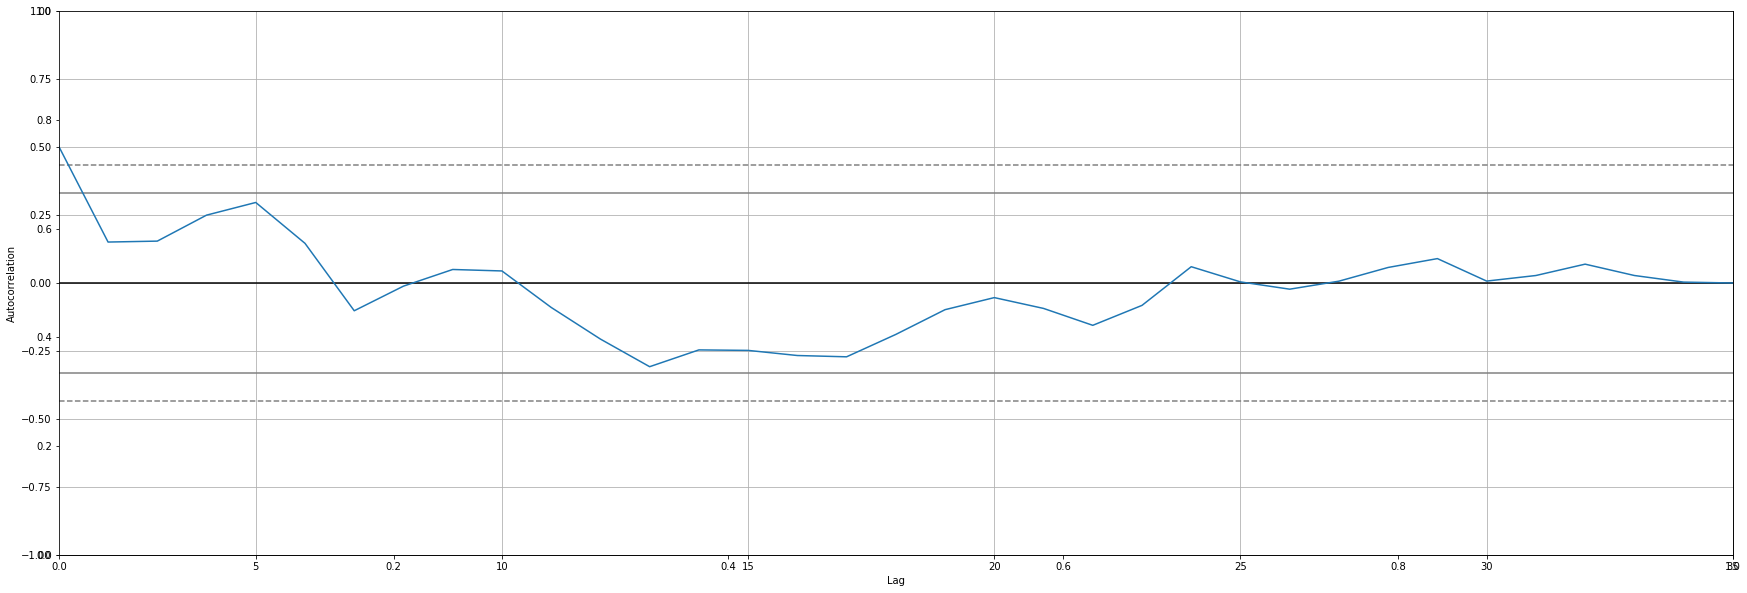

In [125]:
from pandas.tools.plotting import autocorrelation_plot
f1, ax = plt.subplots(figsize = (30,10))
autocorrelation_plot(forecast_df)

In [126]:
#loop through order variables to find the lowest AIC score
AIC_results = pd.DataFrame(columns = ['p','d','q','AIC'],index=[])
i=0
for p in [0,1,2,3,4,5]:
    for q in [0,1,2,3,4,5]:
        for d in [0,1,2]:
            try:
                model = ARIMA(forecast_df,order=(p,d,q))
                model_fit = model.fit(disp=0)
            except:
                line_result = pd.DataFrame({'p':p,'d':d,'q':q,'AIC':np.nan},index=[i])
            else:
                line_result = pd.DataFrame({'p':p,'d':d,'q':q,'AIC':model_fit.aic},index=[i])
            AIC_results = AIC_results.append(line_result)
            i +=1

C:\Users\CiaranCarroll\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\CiaranCarroll\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\CiaranCarroll\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\CiaranCarroll\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\CiaranCarroll\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be 

C:\Users\CiaranCarroll\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\CiaranCarroll\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\CiaranCarroll\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\CiaranCarroll\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\CiaranCarroll\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be 

C:\Users\CiaranCarroll\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\CiaranCarroll\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\CiaranCarroll\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\CiaranCarroll\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\CiaranCarroll\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be us

C:\Users\CiaranCarroll\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\CiaranCarroll\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\CiaranCarroll\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\CiaranCarroll\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\CiaranCarroll\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be us

C:\Users\CiaranCarroll\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\CiaranCarroll\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\CiaranCarroll\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\CiaranCarroll\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\CiaranCarroll\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be 

In [127]:
#display top AIC scores
AIC_results.sort_values('AIC',ascending=True).head()

,p,d,q,AIC
32,1,2,4,560.694352
35,1,2,5,562.078376
50,2,2,4,562.551857
44,2,2,2,562.642852
29,1,2,3,562.879758


In [128]:
model = ARIMA(forecast_df, order=(1,2,4))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\CiaranCarroll\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\CiaranCarroll\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:              D2.unit.c   No. Observations:                   33
Model:                 ARIMA(1, 2, 4)   Log Likelihood                -273.347
Method:                       css-mle   S.D. of innovations            807.298
Date:                Tue, 16 Apr 2019   AIC                            560.694
Time:                        22:45:43   BIC                            571.170
Sample:                    07-01-2006   HQIC                           564.219
                         - 03-01-2009                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.5727     29.662     -0.019      0.985     -58.709      57.563
ar.L1.D2.unit.c    -0.9780      0.030    -32.829      0.000      -1.036      -0.920
ma.L1.D2.unit.c     0.0592      

C:\Users\CiaranCarroll\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


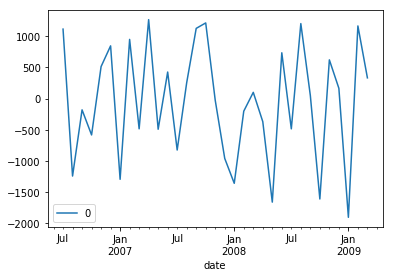

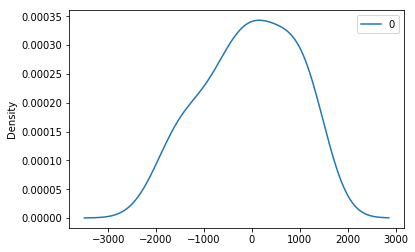

In [146]:
#plot residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
residuals.plot(kind='kde')

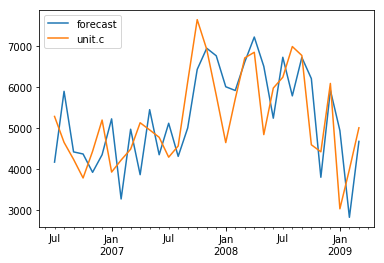

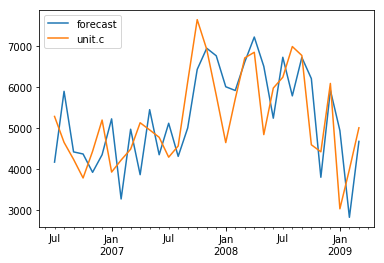

In [147]:
#plot predcited against actual
model_fit.plot_predict()

In [150]:
#create training test split (80:20)
stop = int(len(forecast_df)*.8)
train = forecast_df[:stop]
test = forecast_df[stop:]

In [151]:
#function to calculate the mean squared error
def calc_mse(test, f_cast):
    f_cast = pd.DataFrame(f_cast, columns=['Forecast'],index=test.index)
    f_cast = pd.merge(test,f_cast,right_index=True,left_index=True)
    f_cast['SqErr'] = (f_cast['unit.c']-f_cast['Forecast'])**2
    return f_cast['SqErr'].mean()

In [152]:
model = ARIMA(train,order=(2,1,2))
model_fit = model.fit(disp=0)
f_cast, stderr, conf = model_fit.forecast(steps = len(test),alpha=0.05)

C:\Users\CiaranCarroll\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\CiaranCarroll\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [153]:
#loop through order variables to find the best fit on test data
MSE_results = pd.DataFrame(columns = ['p','d','q','MSE'],index=[])
i=0
for p in [0,1,2,3,4,5]:
    for q in [0,1,2,3,4,5]:
        for d in [0,1,2]:
            try:
                model = ARIMA(train,order=(p,d,q))
                model_fit = model.fit(disp=0)
                f_cast, stderr, conf = model_fit.forecast(steps = len(test),alpha=0.05)
                mse = calc_mse(test, f_cast)
            except:
                line_result = pd.DataFrame({'p':p,'d':d,'q':q,'MSE':np.nan},index=[i])
            else:
                line_result = pd.DataFrame({'p':p,'d':d,'q':q,'MSE':mse},index=[i])
            MSE_results = MSE_results.append(line_result)
            i +=1

C:\Users\CiaranCarroll\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\CiaranCarroll\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\CiaranCarroll\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\CiaranCarroll\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\CiaranCarroll\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be 

C:\Users\CiaranCarroll\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\CiaranCarroll\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\CiaranCarroll\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\CiaranCarroll\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\CiaranCarroll\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be 

C:\Users\CiaranCarroll\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\CiaranCarroll\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\CiaranCarroll\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\CiaranCarroll\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\CiaranCarroll\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Che

C:\Users\CiaranCarroll\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\CiaranCarroll\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\CiaranCarroll\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\CiaranCarroll\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\CiaranCarroll\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be 

C:\Users\CiaranCarroll\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\CiaranCarroll\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\CiaranCarroll\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\CiaranCarroll\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\CiaranCarroll\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be 

In [154]:
MSE_results.sort_values('MSE',ascending=True).head(10)

,p,d,q,MSE
3,0,0,1,1.283649e+06
36,2,0,0,1.380780e+06
39,2,0,1,1.410897e+06
24,1,0,2,1.507949e+06
0,0,0,0,1.529038e+06
21,1,0,1,1.541523e+06
54,3,0,0,1.681694e+06
18,1,0,0,1.770219e+06
60,3,0,2,2.014994e+06
78,4,0,2,2.114491e+06


In [161]:
model = ARIMA(forecast_df,order=(3,0,2))
model_fit = model.fit(disp=0)
f_cast, stderr, conf = model_fit.forecast(steps = len(test),alpha=0.05)

C:\Users\CiaranCarroll\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [165]:
#create df from forecasted units and actual
f_cast = pd.DataFrame(f_cast, columns=['Forecast'],index=test.index)
f_cast = pd.merge(test,f_cast,right_index=True,left_index=True)

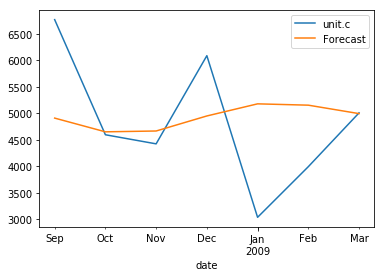

In [166]:
#plot actual and forecast
f_cast.plot()

In [170]:
#create forecast of next 12 months using model above
forecast = model_fit.forecast(steps = 12, alpha=0.15)

In [171]:
#create date series of next 12 months
date_series = []
for x in [4,5,6,7,8,9,10,11,12,1,2,3]:
    if x < 4:
        year=2010
    else:
        year = 2009
    date_time_str = str(year)+'-'+str(x)+'-'+'1'+' 00:00:00'
    date = datetime.strptime(date_time_str,'%Y-%m-%d %H:%M:%S')
    date_series.append(date)

In [172]:
#create df of model forecast outputs and date series
forecast_12m = pd.DataFrame({'Forecast':forecast[0],'StdErr':forecast[1],'ConfIntLow':forecast[2][:,0],'ConfIntHigh':forecast[2][:,1]},index=date_series)

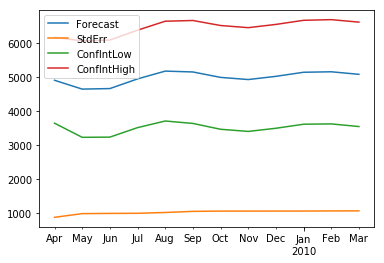

In [173]:
forecast_12m.plot()

In [174]:
#write forecast to csv
forecast_12m.to_csv('forecast_12m.csv')